In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# New section

In [ ]:
# Loading the data
from google.colab import files
files.upload()



Saving data.csv to data.csv


{'data.csv': b'mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis\r\n17.99,10.38,122.8,1001.0,0.1184,0\r\n20.57,17.77,132.9,1326.0,0.08474,0\r\n19.69,21.25,130.0,1203.0,0.1096,0\r\n11.42,20.38,77.58,386.1,0.1425,0\r\n20.29,14.34,135.1,1297.0,0.1003,0\r\n12.45,15.7,82.57,477.1,0.1278,0\r\n18.25,19.98,119.6,1040.0,0.09463,0\r\n13.71,20.83,90.2,577.9,0.1189,0\r\n13.0,21.82,87.5,519.8,0.1273,0\r\n12.46,24.04,83.97,475.9,0.1186,0\r\n16.02,23.24,102.7,797.8,0.08206,0\r\n15.78,17.89,103.6,781.0,0.0971,0\r\n19.17,24.8,132.4,1123.0,0.0974,0\r\n15.85,23.95,103.7,782.7,0.08401,0\r\n13.73,22.61,93.6,578.3,0.1131,0\r\n14.54,27.54,96.73,658.8,0.1139,0\r\n14.68,20.13,94.74,684.5,0.09867,0\r\n16.13,20.68,108.1,798.8,0.117,0\r\n19.81,22.15,130.0,1260.0,0.09831,0\r\n13.54,14.36,87.46,566.3,0.09779,1\r\n13.08,15.71,85.63,520.0,0.1075,1\r\n9.504,12.44,60.34,273.9,0.1024,1\r\n15.34,14.26,102.5,704.4,0.1073,0\r\n21.16,23.04,137.2,1404.0,0.09428,0\r\n16.65,21.38,110.0,904.6,0.1121,0\

In [ ]:
#creating a data frame variable and moving data into it
df=pd.read_csv('data.csv')
df.head(7)




,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0


In [ ]:
#counting the rows and columns
df.shape


(569, 6)

In [ ]:
#feature selection algos
#Univariate selection 
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data=pd.read_csv("data.csv")
x=data.iloc[:,0:5]#independent column
y=data.iloc[:,-1]#target column

In [ ]:
#applying the  SelectKBest class to extract top 5 best
best_features=SelectKBest(score_func=chi2 , k=5)
fit=best_features.fit(x,y)




In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)#specs are basically the column heads

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)#calculation of scores using chi2 test
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,mean_radius,266.104917
1,mean_texture,93.897508
2,mean_perimeter,2011.102864
3,mean_area,53991.655924
4,mean_smoothness,0.149899


In [ ]:

print(featureScores.nlargest(5,'Score'))

             Specs         Score
3        mean_area  53991.655924
2   mean_perimeter   2011.102864
0      mean_radius    266.104917
1     mean_texture     93.897508
4  mean_smoothness      0.149899


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import statsmodels.api as sm

def read_path(path):
    df = pd.read_csv(path)
    print('shape ' , df.shape)
    print()
    print(df.info())
    return df.iloc[:,0:-1],df.iloc[:,-1]


def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    data = list(data)
    for i in range(len(data)):
        if data[i] in best_features:
            data[i] = True
        else :
            data[i] = False
    return data


def indexes(X,ar):
    index_array = []
    c = 0
    for i in list(ar[0]):
        if i == True:
            index_array.append(c)
        c+=1
    print(index_array)
    return X.iloc[:,index_array]


X,y = read_path('data.csv')
#X,y = read_path('D:\HAckathons\Bytecamp-Innovations-Techxtar\dataset3.csv')


columns = pd.DataFrame(list(X.columns))



forward_selection = pd.DataFrame(forward_selection(X, y))
X0 = indexes(X,forward_selection)

chi_square = pd.DataFrame(SelectKBest(score_func=chi2 , k='all').fit(X0,y).get_support())
X1 = indexes(X0,chi_square)

RFC = pd.DataFrame(SelectFromModel(RandomForestClassifier(random_state=0)).fit(X1, y).get_support())
X2 = indexes(X1,RFC)

lss = pd.DataFrame(SelectFromModel(Lasso(random_state=0)).fit(X2, y).get_support())
X3 = indexes(X2,lss)

print(X.columns)
print(X0.columns)
print(X1.columns)
print(X2.columns)
print(X3.columns)


# result = pd.concat([columns,chi_square,RFC,lss,lr,forward_selection],axis=1)
# result = pd.concat([result,result.sum(axis=1)],axis=1)
# result.columns = ['Specs','Chi-square','Random Forest','Lasso','Logistic Regression','Forward Selection','Total']

# result.to_csv('result.csv')

# print('Saved Result.csv')

shape  (569, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None
[1, 2, 3, 4]
[0, 1, 2, 3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


[1, 2]
[1]
Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')
Index(['mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'], dtype='object')
Index(['mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'], dtype='object')
Index(['mean_perimeter', 'mean_area'], dtype='object')
Index(['mean_area'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

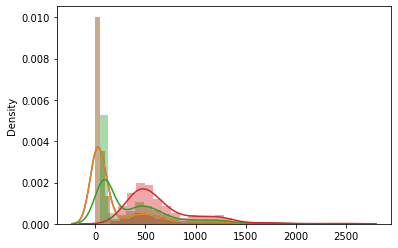

In [ ]:
#visualizing the data for each feature selection algo
sns.distplot(X0)
sns.distplot(X1)
sns.distplot(X2)
sns.distplot(X3)

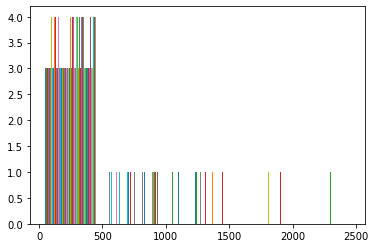

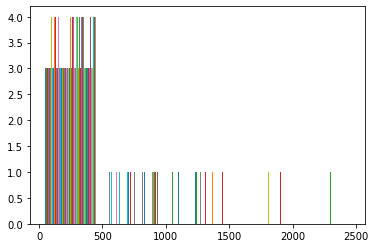

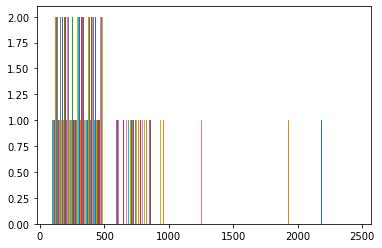

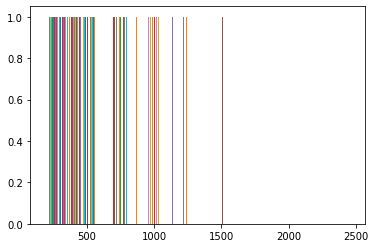

In [ ]:

plt.hist(X0, 5)
plt.show()

plt.hist(X1, 5)
plt.show()

plt.hist(X2, 5)
plt.show()

plt.hist(X3, 5)
plt.show()

In [ ]:
np.var(X0)



mean_texture           18.466397
mean_perimeter        589.402799
mean_area          123625.903080
mean_smoothness         0.000197
dtype: float64

In [ ]:
np.cor(X0)

NameError: ignored